<a href="https://colab.research.google.com/github/irina-marko/Minimal-metric-dimension/blob/main/Brute_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import random
from itertools import combinations
from functools import partial
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import time
import re

In [2]:
def precompute_shortest_paths(G):
  return dict(nx.all_pairs_bellman_ford_path_length(G))

In [3]:
def is_resolving_set(G, nodes, shortest_paths):
    for u, v in combinations(G.nodes, 2):
        distances_u = [shortest_paths[u][node] for node in nodes]
        distances_v = [shortest_paths[v][node] for node in nodes]

        if not any(dist_u != dist_v for dist_u, dist_v in zip(distances_u, distances_v)):
            return False
    return True

In [4]:
def brute_force_metric_dimension(G, shortest_paths, start_time):
  n= len(G.nodes)
  for r in range(1,n+1):
    if time.time() - start_time >= 500:
      return -1

    for nodes in combinations(G.nodes, r):
      if is_resolving_set(G, nodes, shortest_paths):
        return nodes
  return None


Linijski graf
Testing graph with nodes: [0, 1, 2, 3, 4]


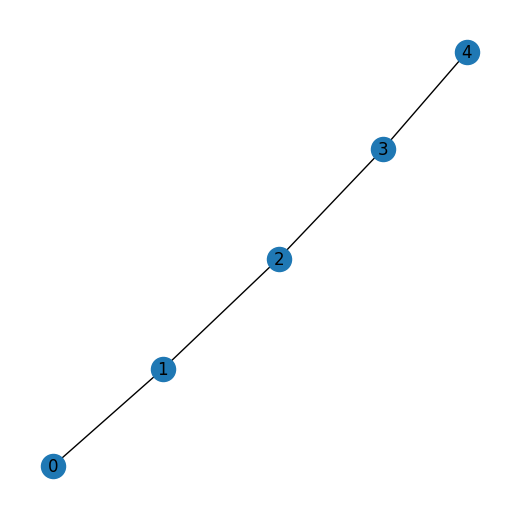


Genetic algorithm execution time: 0.00 seconds
Brute-force rešavanje:
Minimum resolving set: (0,)
Metric dimension: 1

Potpuni graf
Testing graph with nodes: [0, 1, 2, 3]


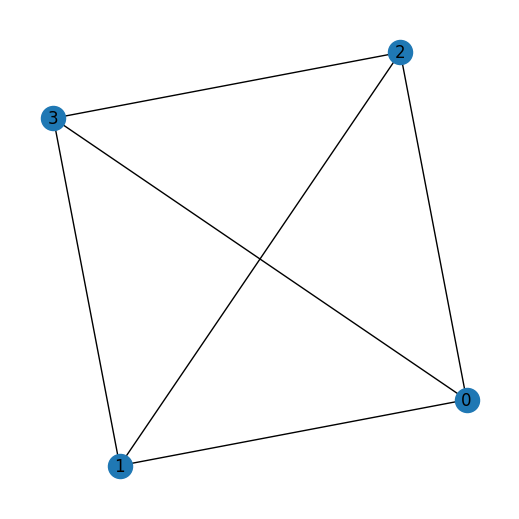


Genetic algorithm execution time: 0.00 seconds
Brute-force rešavanje:
Minimum resolving set: (0, 1, 2)
Metric dimension: 3

Ciklični graf
Testing graph with nodes: [0, 1, 2, 3, 4, 5]


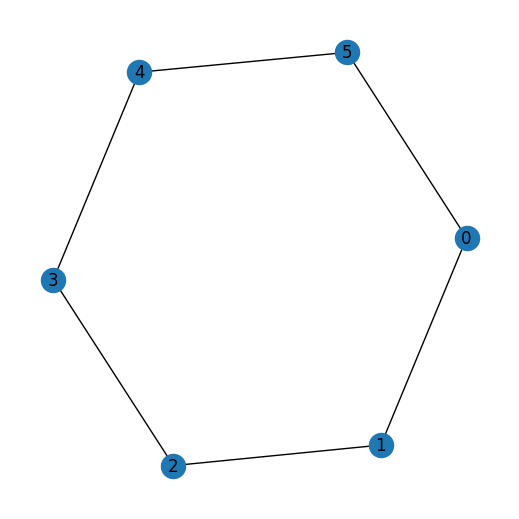


Genetic algorithm execution time: 0.00 seconds
Brute-force rešavanje:
Minimum resolving set: (0, 1)
Metric dimension: 2

Zvezdasti graf
Testing graph with nodes: [0, 1, 2, 3, 4, 5]


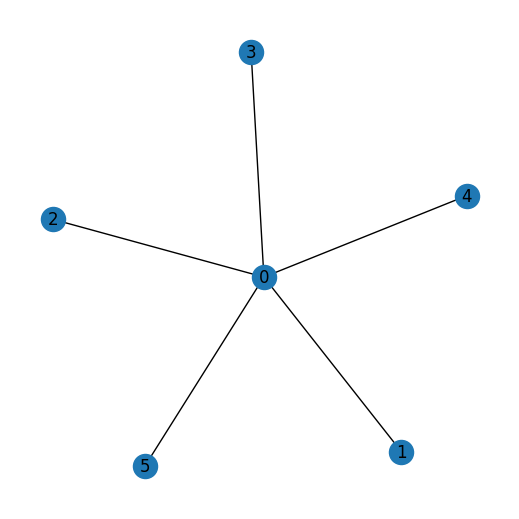


Genetic algorithm execution time: 0.00 seconds
Brute-force rešavanje:
Minimum resolving set: (1, 2, 3, 4)
Metric dimension: 4


In [5]:
def test_graph(G):

    plt.figure(figsize=(5, 5))
    print("Testing graph with nodes:", G.nodes)
    nx.draw(G, with_labels=True)
    plt.show()
    print()
    # Brute-force
    start_time = time.time()
    brute_force_solution = brute_force_metric_dimension(G, precompute_shortest_paths(G), time.time())
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Display results
    print(f"Genetic algorithm execution time: {elapsed_time:.2f} seconds")
    brute_force_solution = brute_force_metric_dimension(G, precompute_shortest_paths(G), time.time())
    if(brute_force_metric_dimension == -1):
      print('Time Expired\n')
    else:
      print("Brute-force rešavanje:")
      print("Minimum resolving set:", brute_force_solution)
      print("Metric dimension:", len(brute_force_solution))



# Primer 1: Linijski graf
G1 = nx.path_graph(5)
print("\nLinijski graf")
test_graph(G1)

# Primer 2: Potpuni graf
G2 = nx.complete_graph(4)
print("\nPotpuni graf")
test_graph(G2)

# Primer 3: Ciklični graf
G3 = nx.cycle_graph(6)
print("\nCiklični graf")
test_graph(G3)

# Primer 4: Zvezdasti graf
G4 = nx.star_graph(5)
print("\nZvezdasti graf")
test_graph(G4)

